# Modelos Aditivos Generalizados (GAM)



In [1]:
import numpy as np
import pandas as pd
from patsy import dmatrix
from matplotlib import pyplot as plt

import statsmodels.api as sm
from pygam import LinearGAM, s, GAM, l

In [2]:
# cargamos los datos
data_RF = pd.read_csv("seleccion_variables_RF_bathandrooms.csv",sep=',')

data_RF = data_RF.drop('Unnamed: 0',axis=1)#eliminamos la primera columna. 

columns=['Landsize','Distancia_NEW','Longtitude','Lattitude','Price']
data=(data_RF[columns])



FileNotFoundError: [Errno 2] No such file or directory: 'seleccion_variables_RF_bathandrooms.csv'

In [3]:

# Hemos separado  el 70%

# dividir el data set de forma aleatoria 

p_train = 0.70 # Porcentaje de train.

data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train
train, test = data[data['is_train']==True], data[data['is_train']==False]
df = data.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(train))
print("Ejemplos usados para test: ", len(test))

Ejemplos usados para entrenar:  19117
Ejemplos usados para test:  7939


<ipython-input-3-11c8ba3aaad8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_train'] = np.random.uniform(0, 1, len(data)) <= p_train


In [4]:
#Seleccion de varaibles
X = train[['Distancia_NEW','Lattitude','Longtitude','Landsize']].values
y = train['Price'].values

X_test=test[['Distancia_NEW','Lattitude','Longtitude','Landsize']].values
y_test=test['Price'].values

y =np.array(y).reshape(-1, 1)
y_test=y_test.reshape(-1, 1)


In [5]:
#NORMALIZACION
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [6]:
scaler = preprocessing.StandardScaler().fit(y)
y = scaler.transform(y)
y_test = scaler.transform(y_test)


Implementamos  GAM linear  sin hacer ningun tipo de smooth y observamos los resultados. 

In [7]:
from pygam import LinearGAM

#Fit a model with the default parameters
gam = LinearGAM().fit(X, y)

In [8]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     50.7876
Link Function:                     IdentityLink Log Likelihood:                                -25126.7391
Number of Samples:                        19117 AIC:                                            50357.0534
                                                AICc:                                           50357.3402
                                                GCV:                                                0.7936
                                                Scale:                                              0.7898
                                                Pseudo R-Squared:                                   0.2123
Feature Function                  Lam

<ipython-input-8-dec6a6acdaaa>:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


R cuadrado oscina entre 0 (mal ajuste) y 1 ( ajuste perfecto), en nuestro caso es bastante bajo por lo que el error es my alto. AIC y AICC son bastante parecido por lo que puede considerase que los gradis de libertad son optimos. AIC cuanto más pequeño mejor. 

### B-SPLINES

Implementamos b-splines para suavizar el modelo con respecto a todas las variables. 

In [27]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0)+ s(1)+s(2)+ s(3))
gam_pbs.gridsearch(X,y) # .reshape(-1,1)
yy_pred_pbs = gam_pbs.predict(X)#.reshape(-1,1)

gam_pbs.summary()



100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     64.5731
Link Function:                     IdentityLink Log Likelihood:                                 -24930.779
Number of Samples:                        19117 AIC:                                            49992.7043
                                                AICc:                                           49993.1626
                                                GCV:                                                0.7734
                                                Scale:                                              0.7687
                                                Pseudo R-Squared:                                   0.2339
Feature Function                  Lam

<ipython-input-27-8a4eaae0a50c>:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_pbs.summary()


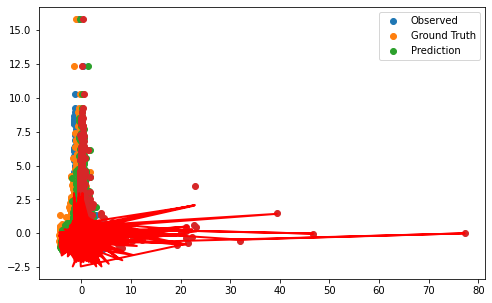

In [23]:
plt.figure(figsize=(8,5))
plt.plot(X,y, 'o')
##plt.plot(xx,ffun(xx), color="red", LineWidth=3)
plt.plot(X,yy_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [20]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0)+ l(1) +s(2) + s(3))
gam_pbs.gridsearch(X,y) # .reshape(-1,1)
yy_pred_pbs = gam_pbs.predict(X)#.reshape(-1,1)

gam_pbs.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     48.6502
Link Function:                     IdentityLink Log Likelihood:                                -25035.7079
Number of Samples:                        19117 AIC:                                            50170.7163
                                                AICc:                                           50170.9801
                                                GCV:                                                 0.783
                                                Scale:                                              0.7794
                                                Pseudo R-Squared:                                   0.2226
Feature Function                  Lam

<ipython-input-20-64e1685a606d>:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_pbs.summary()


In [21]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0)+ s(1) +l(2) + s(3))
gam_pbs.gridsearch(X,y) # .reshape(-1,1)
yy_pred_pbs = gam_pbs.predict(X)#.reshape(-1,1)

gam_pbs.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     47.6823
Link Function:                     IdentityLink Log Likelihood:                                -25063.1828
Number of Samples:                        19117 AIC:                                            50223.7302
                                                AICc:                                           50223.9839
                                                GCV:                                                 0.786
                                                Scale:                                              0.7825
                                                Pseudo R-Squared:                                   0.2195
Feature Function                  Lam

<ipython-input-21-2dd7d891763a>:6: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_pbs.summary()


In [26]:
gam_pbs = LinearGAM(s(0)+ s(1) +s(2) + l(3))
gam_pbs.gridsearch(X,y) # .reshape(-1,1)
yy_pred_pbs = gam_pbs.predict(X)#.reshape(-1,1)

gam_pbs.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      51.429
Link Function:                     IdentityLink Log Likelihood:                                -25620.0694
Number of Samples:                        19117 AIC:                                            51344.9968
                                                AICc:                                           51345.2907
                                                GCV:                                                0.8481
                                                Scale:                                               0.844
                                                Pseudo R-Squared:                                   0.1582
Feature Function                  Lam

<ipython-input-26-a2a3e41296d5>:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_pbs.summary()


Parece que ninguna de las variables  corresponde a un ajuste lineal , por lo que seguiremos explorando el b-spline. 

In [29]:
gam_pbs = LinearGAM(s(0)+ s(1) +s(2) + s(3),fit_intercept=True, n_splines=50, max_iter=10)
gam_pbs.gridsearch(X,y) # .reshape(-1,1)
yy_pred_pbs = gam_pbs.predict(X)#.reshape(-1,1)

gam_pbs.summary()


100% (11 of 11) |########################| Elapsed Time: 0:00:12 Time:  0:00:12


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    149.9662
Link Function:                     IdentityLink Log Likelihood:                                -24347.7965
Number of Samples:                        19117 AIC:                                            48997.5253
                                                AICc:                                           48999.9447
                                                GCV:                                                0.7165
                                                Scale:                                              0.7064
                                                Pseudo R-Squared:                                   0.2992
Feature Function                  Lam

<ipython-input-29-ddadad57a51b>:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_pbs.summary()


In [10]:
XX = generate_X_grid(gam)
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(data.feature_names[0:6]))
titles = data.feature_names
for i, ax in enumerate(axs):
    pdep, confi = gam.partial_dependence(XX, feature=i+1, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[0][:, 0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    ax.set_title(titles[i],fontsize=26)
plt.show()

NameError: name 'generate_X_grid' is not defined

In [9]:
gam = LinearGAM(n_splines=10).gridsearch(X, y)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     32.8033
Link Function:                     IdentityLink Log Likelihood:                                -25368.3139
Number of Samples:                        19117 AIC:                                            50804.2343
                                                AICc:                                           50804.3576
                                                GCV:                                                0.8179
                                                Scale:                                              0.8154
                                                Pseudo R-Squared:                                    0.186
Feature Function                  Lam

<ipython-input-9-c1bd2bc37aa4>:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


Para conocer la contribución total (lineal y no lineal) de los predictores transformados por funciones smooth se puede emplear la función drop1(). Esta función calcula el impacto que tiene en el modelo (en términos de grados de libertad totales, AIC y significancia estadística) el eliminar cada uno de los predictores de forma secuencial.

In [15]:
drop1(gam_pbs, parallel = "multicore", ncpus = 4)

NameError: name 'drop1' is not defined

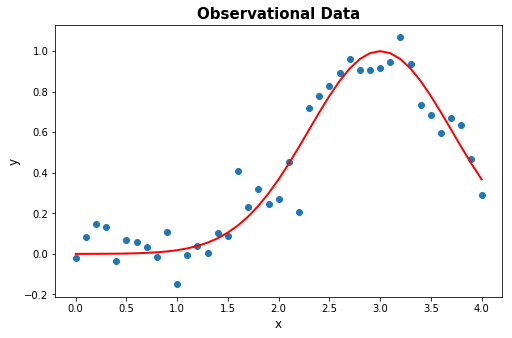

In [53]:
# DGM 1: Truncated normal density
def ffun(x):
    return np.exp(-(x-3)**2)

nn = 41
xx = np.linspace(0, 4, nn)
np.random.seed(2019)
yy = ffun(xx) + 0.1*np.random.normal(0, 1, len(xx))

plt.figure(1, figsize=(8, 5))
plt.plot(xx, yy, 'o')
plt.plot(xx, ffun(xx), color="red", LineWidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Observational Data', fontsize=15, fontweight="bold")
plt.show()

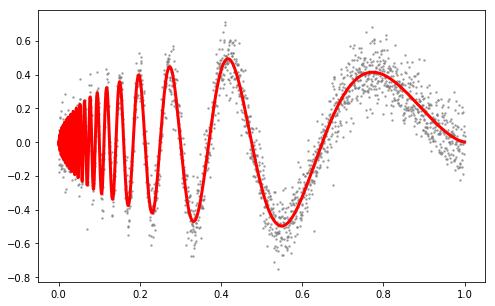

In [54]:
# DGM 2: Doppler Function
def doppler(DataNum, noise_level):
    x = np.linspace(0, 1, DataNum)
    y_wo_noise = np.sqrt(x*(1-x))*np.sin((2.1*np.pi)/(x+0.05))
    y_with_noise = y_wo_noise + noise_level*np.random.normal(0, 1, DataNum) 
    return x, y_wo_noise, y_with_noise

n = 2000
x, y_wo_noise, y_with_noise = doppler(n, 0.1)
plt.figure(1, figsize=(8, 5))
plt.plot(x, y_with_noise, '.', MarkerSize=3,color='gray',alpha=0.6)
plt.plot(x, y_wo_noise, color="red", LineWidth=3)
plt.show()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


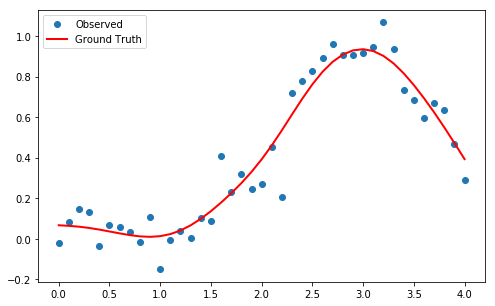

In [55]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0))
gam_pbs.gridsearch(xx.reshape(-1,1),yy)
yy_pred_pbs = gam_pbs.predict(xx.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.plot(xx,yy, 'o')
#plt.plot(xx,ffun(xx), color="red", LineWidth=3)
plt.plot(xx,yy_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

 da resultados parecidos a regresion lineal. Lso rgados de lobertad efecivos , en la regeison lienal elos grads de liobertad es  el nuemro de vraibels pero en GAm tienes splines pero estna penalizados , no peudestneer encuenta por ejempo el numero de noddos. se calucla de forma eulistica. 
 
  da una pista de cuanto nos perocupamos si es mucho o no pero las graficas de dependencia es mas importnate . tiene un gran warning por que son mucho mas pequeños de lo eserado pero sirve para hacer a la idea , pero mejor la represntacion visual. Si sale muy recta auqnue salga aqui significativa lo mejores quitarlo. 
  
  AIC  el AICC es la version mejorada pero no suele usarse pero es una medida bastante buena. 
  si no hay muhca difrencia signica que no nos estbamos flipando los grados de libertdad. 
  
   Antes de usar el R cuadrado usar alg asm tangible como un mape o rooming square, que nso de pistas de ver como eta hacedno la cosa. vienebien analizar el error por tramos. 
   
por ejemplo ver la densidad de datos en relacion al error. 
   
  con un buena parte de regularizacion se peuden bjar el nuemro de grados de liberdad que es lo de DoF 
  

In [56]:
gam_pbs.summary()# da resultados parecidos a regresion lineal. Lso rgados de lobertad efecivos , en la regeison lienal elos grads de liobertad es  el nuemro de vraibels pero en GAm tienes splines pero estna penalizados , no peudestneer encuenta por ejem

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.0957
Link Function:                     IdentityLink Log Likelihood:                                 -1495.5101
Number of Samples:                           41 AIC:                                             3005.2117
                                                AICc:                                            3008.7033
                                                GCV:                                                0.0144
                                                Scale:                                              0.0106
                                                Pseudo R-Squared:                                    0.932
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


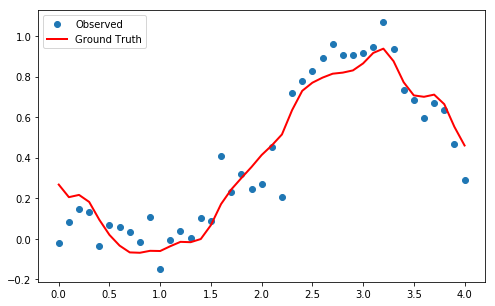

In [57]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0), n_splines=50)
gam_pbs.fit(xx.reshape(-1,1),yy)
yy_pred_pbs = gam_pbs.predict(xx.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.plot(xx,yy, 'o')
#plt.plot(xx,ffun(xx), color="red", LineWidth=3)
plt.plot(xx,yy_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

por ejemplo en la ultima poarte re ve que estamos sobre ajstnado. 

aumentan los grados de lertar de 6 a 10 que es casi el doble auqnue no es tan grande. baja el AIC 

el landa no esta ni marcado . 
 rank son los nodos. 

In [58]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      9.9606
Link Function:                     IdentityLink Log Likelihood:                                  -807.9419
Number of Samples:                           41 AIC:                                             1637.8049
                                                AICc:                                            1646.8337
                                                GCV:                                                0.0288
                                                Scale:                                              0.0165
                                                Pseudo R-Squared:                                   0.9058
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


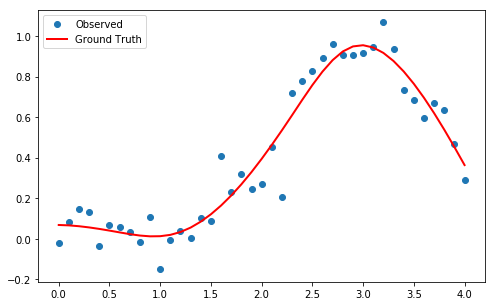

In [59]:
# PENALIZED B-SPLINES IN PYGAM
gam_pbs = LinearGAM(s(0), n_splines=10)
gam_pbs.gridsearch(xx.reshape(-1,1),yy, lam = [0.1, 1, 10, 100, 1000])
yy_pred_pbs = gam_pbs.predict(xx.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.plot(xx,yy, 'o')
#plt.plot(xx,ffun(xx), color="red", LineWidth=3)
plt.plot(xx,yy_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [60]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.2769
Link Function:                     IdentityLink Log Likelihood:                                 -1472.3335
Number of Samples:                           41 AIC:                                             2959.2208
                                                AICc:                                            2962.9019
                                                GCV:                                                0.0147
                                                Scale:                                              0.0107
                                                Pseudo R-Squared:                                   0.9317
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


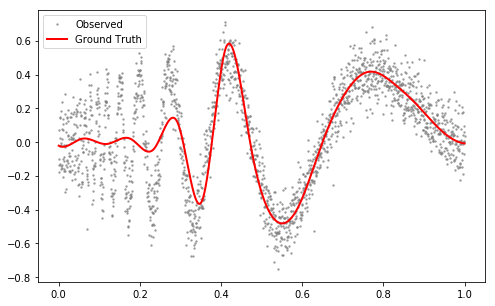

In [61]:
gam_pbs = LinearGAM(s(0))
gam_pbs.gridsearch(x.reshape(-1,1),y_with_noise)
y_pred_pbs = gam_pbs.predict(x.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.plot(x,y_with_noise, '.', MarkerSize=3,color='gray',alpha=0.6)
#plt.plot(x,y_wo_noise, color="red", LineWidth=3)
plt.plot(x,y_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [62]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.3391
Link Function:                     IdentityLink Log Likelihood:                                -31294.1572
Number of Samples:                         2000 AIC:                                            62628.9926
                                                AICc:                                           62629.4313
                                                GCV:                                                0.0275
                                                Scale:                                               0.027
                                                Pseudo R-Squared:                                   0.7105
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


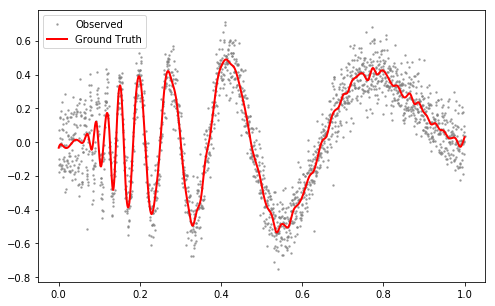

In [63]:
gam_pbs = LinearGAM(s(0), fit_intercept=True, n_splines=100, max_iter=100)
gam_pbs.gridsearch(x.reshape(-1,1),y_with_noise)
y_pred_pbs = gam_pbs.predict(x.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.plot(x,y_with_noise, '.', MarkerSize=3,color='gray',alpha=0.6)
#plt.plot(x,y_wo_noise, color="red", LineWidth=3)
plt.plot(x,y_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [64]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     87.1489
Link Function:                     IdentityLink Log Likelihood:                                -68492.7622
Number of Samples:                         2000 AIC:                                           137161.8222
                                                AICc:                                          137170.0472
                                                GCV:                                                0.0138
                                                Scale:                                              0.0127
                                                Pseudo R-Squared:                                   0.8686
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


100% (2 of 2) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


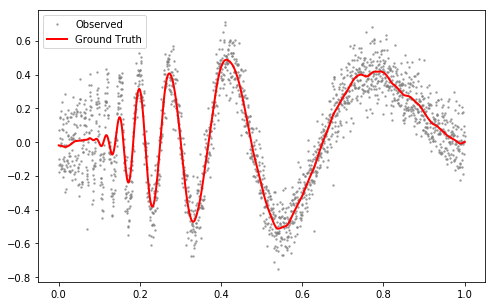

In [69]:
gam_pbs = LinearGAM(s(0), fit_intercept=True, n_splines=300, max_iter=100)
gam_pbs.gridsearch(x.reshape(-1,1),y_with_noise, lam = [100, 1000])
y_pred_pbs = gam_pbs.predict(x.reshape(-1,1))

plt.figure(figsize=(8,5))
plt.plot(x,y_with_noise, '.', MarkerSize=3,color='gray',alpha=0.6)
#plt.plot(x,y_wo_noise, color="red", LineWidth=3)
plt.plot(x,y_pred_pbs, color='red', LineWidth=2)
plt.legend(["Observed", "Ground Truth", "Prediction"])
plt.show()

In [70]:
gam_pbs.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     53.2081
Link Function:                     IdentityLink Log Likelihood:                                -60857.6308
Number of Samples:                         2000 AIC:                                           121823.6778
                                                AICc:                                          121826.7555
                                                GCV:                                                0.0151
                                                Scale:                                              0.0144
                                                Pseudo R-Squared:                                    0.848
Feature Function                  Lam

/home/vacek/anaconda3/envs/repsol_coker/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.
